In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("SraRunTable.csv", delimiter="\t")
df

,BioSample,Experiment,Library_Name,MBases,MBytes,Organism,Run,SRA_Sample,Sample_Name,cultivar,...,LibrarySelection,LibrarySource,LoadDate,Platform,ReleaseDate,SRA_Study,age,geo_loc_name,growth_protocol,tissue
0,SAMN06036200,SRX2360398,SHB4.5_14,4662,3189,Vaccinium corymbosum,SRR5036116,SRS1808885,"RNA-Seq Vaccinium corymbosum root, pH 4.5",Emerald,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
1,SAMN06036203,SRX2360399,SHB6.5_11,8403,5791,Vaccinium corymbosum,SRR5036117,SRS1808886,"RNA-Seq Vaccinium corymbosum root, pH 6.5",Emerald,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
2,SAMN06036200,SRX2360400,SHB4.5_16,6914,4754,Vaccinium corymbosum,SRR5036118,SRS1808885,"RNA-Seq Vaccinium corymbosum root, pH 4.5",Emerald,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
3,SAMN06036200,SRX2360401,SHB4.5_15,7112,4866,Vaccinium corymbosum,SRR5036119,SRS1808885,"RNA-Seq Vaccinium corymbosum root, pH 4.5",Emerald,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
4,SAMN06036196,SRX2360402,VA4.5_8,4081,2803,Vaccinium arboreum,SRR5036120,SRS1808887,"RNA-Seq Vaccinium arboreum root, pH 4.5",FL09-502,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
5,SAMN06036196,SRX2360403,VA4.5_5,2833,1970,Vaccinium arboreum,SRR5036121,SRS1808887,"RNA-Seq Vaccinium arboreum root, pH 4.5",FL09-502,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
6,SAMN06036197,SRX2360404,VA6.5_1,3344,2292,Vaccinium arboreum,SRR5036122,SRS1808888,"RNA-Seq Vaccinium arboreum root, pH 6.5",FL09-502,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
7,SAMN06036196,SRX2360405,VA4.5_6,3600,2478,Vaccinium arboreum,SRR5036123,SRS1808887,"RNA-Seq Vaccinium arboreum root, pH 4.5",FL09-502,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
8,SAMN06036203,SRX2360406,SHB6.5_10,6491,4466,Vaccinium corymbosum,SRR5036124,SRS1808886,"RNA-Seq Vaccinium corymbosum root, pH 6.5",Emerald,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root
9,SAMN06036203,SRX2360407,SHB6.5_12,6808,4725,Vaccinium corymbosum,SRR5036125,SRS1808886,"RNA-Seq Vaccinium corymbosum root, pH 6.5",Emerald,...,other,TRANSCRIPTOMIC,2016-11-18,ILLUMINA,2016-11-23,SRP093536,1 year old,USA,Hydroponic,Root


In [5]:
def clean_name(name):
    name = name.split(".fast")[0]
    name = name.translate(None, './')
    return name

clean_name("../SRX2360398.fasta")
clean_name("SRX2360399.fasta")

SRX2360398
SRX2360399


In [30]:
df.loc[0]['Experiment']

'SRX2360398'

In [37]:
rows = []
labels = []
with open("data/sketches/distances", 'r') as f:
    for i in range(16):
        row = []
        for j in range(16):
            line = f.readline().strip()
            ref, tar, d, p, r = line.split("\t")
            row.append(float(d))
        rows.append(row)
seq = [0,2,3,12,1,8,9,15,4,5,7,11,6,10,13,14]
outrows = []
for i in range(16):
    labels.append(df.loc[seq[i]]['Experiment'])
    outrow = []
    for j in range(16):
        outrow.append(rows[seq[i]][seq[j]])
    outrows.append(outrow)

heat = pd.DataFrame(outrows, index=labels, columns=labels)


            

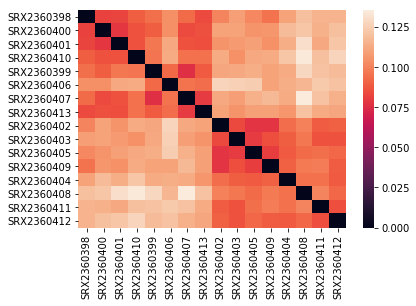

In [38]:
#viz
sns.heatmap(heat)